# Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from statistics import mean

In [2]:
batch1 = pickle.load(open(r'batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [3]:
numBat1 = len(batch1.keys())
numBat1

41

In [4]:
batch2 = pickle.load(open(r'batch2.pkl','rb'))

In [5]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [6]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [7]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [8]:
numBat2 = len(batch2.keys())
numBat2

43

In [9]:
batch3 = pickle.load(open(r'batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

In [10]:
numBat3 = len(batch3.keys())
numBat3

40

In [11]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [12]:
bat_dict = {**batch1, **batch2, **batch3}

In [13]:
for i in bat_dict.keys():
    print(i)

b1c0
b1c1
b1c2
b1c3
b1c4
b1c5
b1c6
b1c7
b1c9
b1c11
b1c14
b1c15
b1c16
b1c17
b1c18
b1c19
b1c20
b1c21
b1c23
b1c24
b1c25
b1c26
b1c27
b1c28
b1c29
b1c30
b1c31
b1c32
b1c33
b1c34
b1c35
b1c36
b1c37
b1c38
b1c39
b1c40
b1c41
b1c42
b1c43
b1c44
b1c45
b2c0
b2c1
b2c2
b2c3
b2c4
b2c5
b2c6
b2c10
b2c11
b2c12
b2c13
b2c14
b2c17
b2c18
b2c19
b2c20
b2c21
b2c22
b2c23
b2c24
b2c25
b2c26
b2c27
b2c28
b2c29
b2c30
b2c31
b2c32
b2c33
b2c34
b2c35
b2c36
b2c37
b2c38
b2c39
b2c40
b2c41
b2c42
b2c43
b2c44
b2c45
b2c46
b2c47
b3c0
b3c1
b3c3
b3c4
b3c5
b3c6
b3c7
b3c8
b3c9
b3c10
b3c11
b3c12
b3c13
b3c14
b3c15
b3c16
b3c17
b3c18
b3c19
b3c20
b3c21
b3c22
b3c24
b3c25
b3c26
b3c27
b3c28
b3c29
b3c30
b3c31
b3c33
b3c34
b3c35
b3c36
b3c38
b3c39
b3c40
b3c41
b3c44
b3c45


# Getting all the features

In [14]:
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [15]:
features_df = pd.DataFrame()

In [16]:
minimum_dQ_100_10 = np.zeros(len(bat_dict.keys()))
variance_dQ_100_10 = np.zeros(len(bat_dict.keys()))
skewness_dQ_100_10 = np.zeros(len(bat_dict.keys()))
kurtosis_dQ_100_10 = np.zeros(len(bat_dict.keys()))

for i, cell in enumerate(bat_dict.values()):
    c10 = cell['cycles']['10']
    c100 = cell['cycles']['100']
    dQ_100_10 = c100['Qdlin'] - c10['Qdlin']
    
    minimum_dQ_100_10[i] = np.log(np.abs(np.min(dQ_100_10)))
    variance_dQ_100_10[i] = np.log(np.var(dQ_100_10))
    skewness_dQ_100_10[i] = np.log(np.abs(skew(dQ_100_10)))
    kurtosis_dQ_100_10[i] = np.log(np.abs(kurtosis(dQ_100_10)))

features_df["minimum_dQ_100_10"] = minimum_dQ_100_10
features_df["variance_dQ_100_10"] = variance_dQ_100_10
features_df["skewness_dQ_100_10"] = skewness_dQ_100_10
features_df["kurtosis_dQ_100_10"] = kurtosis_dQ_100_10


slope_lin_fit_2_100 = np.zeros(len(bat_dict.keys()))
intercept_lin_fit_2_100 = np.zeros(len(bat_dict.keys()))
discharge_capacity_2 = np.zeros(len(bat_dict.keys()))
diff_discharge_capacity_max_2 = np.zeros(len(bat_dict.keys()))

for i, cell in enumerate(bat_dict.values()):
    # Compute linear fit for cycles 2 to 100:
    q = cell['summary']['QD'][1:100].reshape(-1, 1)  # discharge cappacities; q.shape = (99, 1); 
    X = cycle_numbers = cell['summary']['cycle'][1:100].reshape(-1, 1)  # Cylce index from 2 to 100; X.shape = (99, 1)
    
    linear_regressor_2_100 = LinearRegression()
    linear_regressor_2_100.fit(X, q)
    
    slope_lin_fit_2_100[i] = linear_regressor_2_100.coef_[0]
    intercept_lin_fit_2_100[i] = linear_regressor_2_100.intercept_
    discharge_capacity_2[i] = q[0][0]
    diff_discharge_capacity_max_2[i] = np.max(q) - q[0][0]
    
features_df["slope_lin_fit_2_100"] = slope_lin_fit_2_100
features_df["intercept_lin_fit_2_100"] = intercept_lin_fit_2_100
features_df["discharge_capacity_2"] = discharge_capacity_2
features_df["diff_discharge_capacity_max_2"] = diff_discharge_capacity_max_2

mean_charge_time = np.zeros(len(bat_dict.keys()))
minimum_IR = np.zeros(len(bat_dict.keys()))
diff_IR_100_2 = np.zeros(len(bat_dict.keys()))


for i, cell in enumerate(bat_dict.values()):
    mean_charge_time[i] = np.mean(cell['summary']['chargetime'][1:6])
    minimum_IR[i] = np.min(cell['summary']['IR'][1:100])
    diff_IR_100_2[i] = cell['summary']['IR'][100] - cell['summary']['IR'][1]
    
features_df["mean_charge_time"] = mean_charge_time
features_df["minimum_IR"] = minimum_IR
features_df["diff_IR_100_2"] = diff_IR_100_2

In [33]:
features_df.tail()

,minimum_dQ_100_10,variance_dQ_100_10,skewness_dQ_100_10,kurtosis_dQ_100_10,slope_lin_fit_2_100,intercept_lin_fit_2_100,discharge_capacity_2,diff_discharge_capacity_max_2,mean_charge_time,minimum_IR,diff_IR_100_2
119,-4.031907,-10.230704,-1.208466,0.058160,-6.583238e-06,1.050919,1.047404,0.004107,10.043833,0.015481,-0.000166
120,-3.811628,-9.923463,-1.105337,0.051614,-7.692147e-06,1.063392,1.059324,0.004510,10.043563,0.015255,-0.000226
121,-3.704429,-9.669360,-1.177819,0.092749,9.732245e-06,1.053878,1.050522,0.004362,10.042974,0.017007,-0.000173
122,-3.648796,-9.516770,-1.531814,0.207631,4.689737e-06,1.073078,1.069720,0.004185,10.043436,0.015517,-0.000107
123,-4.078264,-10.374099,-1.137084,0.158926,-1.258454e-07,1.071472,1.069549,0.002596,11.037650,0.015557,-0.000081


In [18]:
features_df.shape

(124, 11)

In [19]:
cols = features_df.columns

# Figure 1

In [30]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import numpy as np

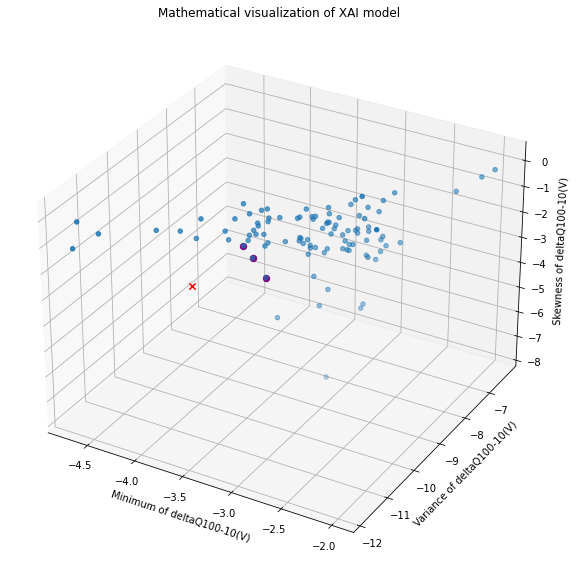

In [73]:
minimum = np.array(features_df['minimum_dQ_100_10'][:99])

variance = np.array(features_df['variance_dQ_100_10'][:99])

skewness = np.array(features_df['skewness_dQ_100_10'][:99])

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = minimum, ys = variance, zs = skewness, s=20)

ax.set_title("Mathematical visualization of XAI model")

ax.set_xlabel("Minimum of deltaQ100-10(V)")

ax.set_ylabel("Variance of deltaQ100-10(V)")

ax.set_zlabel("Skewness of deltaQ100-10(V)")

ax.scatter(features_df['minimum_dQ_100_10'][100], features_df['variance_dQ_100_10'][100], features_df['skewness_dQ_100_10'][100], marker='x', c='red', s=40)
ax.scatter(features_df['minimum_dQ_100_10'][92], features_df['variance_dQ_100_10'][92], features_df['skewness_dQ_100_10'][92], c='purple', s=40)
ax.scatter(features_df['minimum_dQ_100_10'][12], features_df['variance_dQ_100_10'][12], features_df['skewness_dQ_100_10'][12], c='purple', s=40)
ax.scatter(features_df['minimum_dQ_100_10'][5], features_df['variance_dQ_100_10'][5], features_df['skewness_dQ_100_10'][5], c='purple', s=40)

plt.show()

In [16]:
ax.set_xlim(100,200)

ax.set_ylim(20,160)

ax.set_zlim(5,35)

plt.show()

In [17]:
ax.set_xticks([100,125,150,175,200])

plt.show()

In [18]:
fig.set_size_inches(6, 6)

plt.show()

In [42]:
distances = []
for i in range(0,99,1):
    minimum = (features_df['minimum_dQ_100_10'][100] - features_df['minimum_dQ_100_10'][i])**2
    variance = (features_df['variance_dQ_100_10'][100] - features_df['variance_dQ_100_10'][i])**2
    skewness = (features_df['skewness_dQ_100_10'][100] - features_df['skewness_dQ_100_10'][i])**2
    distances.append(np.sqrt(minimum+variance+skewness))


In [47]:
distances

[3.3981090542918477,
 2.7977827325081557,
 2.823111964911307,
 2.5817914675031295,
 2.3133345074615606,
 1.546763440767098,
 2.9290311375207865,
 2.6625281591777386,
 2.7919555913137546,
 2.93921052672472,
 2.2182666138821996,
 2.7625791658516357,
 1.1950540943150418,
 2.3948673202101234,
 2.0579775773737703,
 2.9163709446505472,
 3.377856126254015,
 2.975404208854477,
 1.6161238555230988,
 2.553185867854492,
 2.5256327486989423,
 2.0929882707081044,
 2.613981164816532,
 2.0743694066776954,
 2.0816517200362483,
 2.6754804369699556,
 1.998568713516089,
 2.437929915865381,
 2.128588449049233,
 2.00023747576871,
 1.9503666074536241,
 2.1706030639988594,
 2.6911119353264974,
 2.5941520930082285,
 2.75707149456047,
 1.975732126371517,
 3.629584368149351,
 4.775654571018215,
 2.699379185102401,
 2.9591726819182624,
 2.8840101040410526,
 5.110014354897639,
 5.391241416744875,
 2.3358348149490213,
 4.561828305867941,
 3.388792649628912,
 2.445078539597555,
 3.9619028188063816,
 2.6811990940784

In [52]:
euclidean_distances = pd.DataFrame(distances, columns=['distance'])

In [68]:
three_most_similar_cells = euclidean_distances.nsmallest(5, 'distance')

In [69]:
three_most_similar_cells

,distance
92,1.123222
12,1.195054
5,1.546763
18,1.616124
88,1.681352


# Figure 4